### Why do employees leave

In [194]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [195]:
data = pd.read_csv("HR_comma_sep.csv")

In [196]:
data.shape

(14999, 10)

In [197]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Lets explore the variables in the dataset one by one

In [198]:
#target variable
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

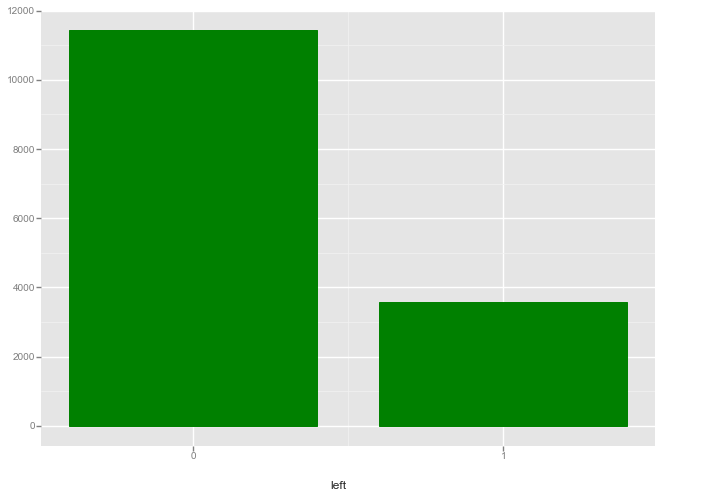

<ggplot: (52499626928)>

In [199]:
ggplot(aes(x = 'left'), data=data) +\
    geom_bar(fill = 'Green')

In [200]:
# percentage of employees who left the organisation
round((data.left.value_counts()[1]/(data.left.value_counts()[0] + data.left.value_counts()[1])) * 100)

24.0

In [201]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [203]:
continuous_columns = ['satisfaction_level','last_evaluation','average_montly_hours']
categorical_columns = ['Work_accident','promotion_last_5years','sales','salary','number_project','time_spend_company']

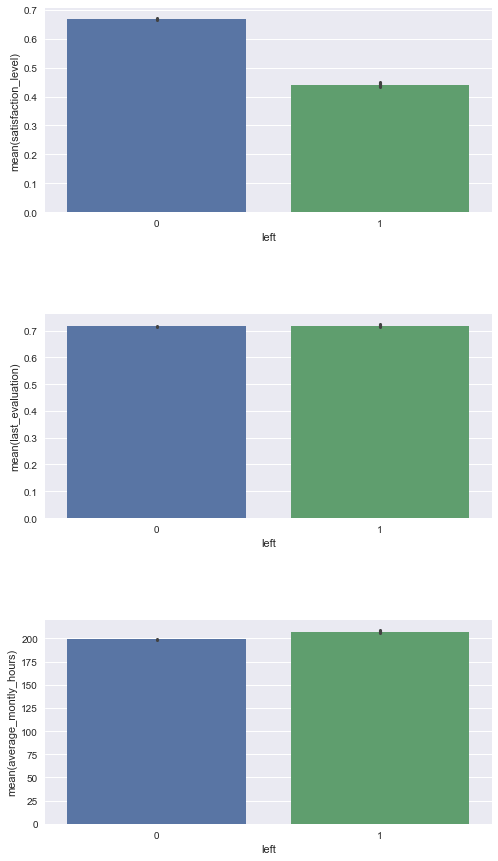

In [204]:
fig, ax = plt.subplots(len(continuous_columns),1,figsize=(8,15))
for i, col in enumerate(continuous_columns):
    sns.barplot(x="left", y=col, data=data, ax = ax[i])
    plt.subplots_adjust(hspace=0.5)

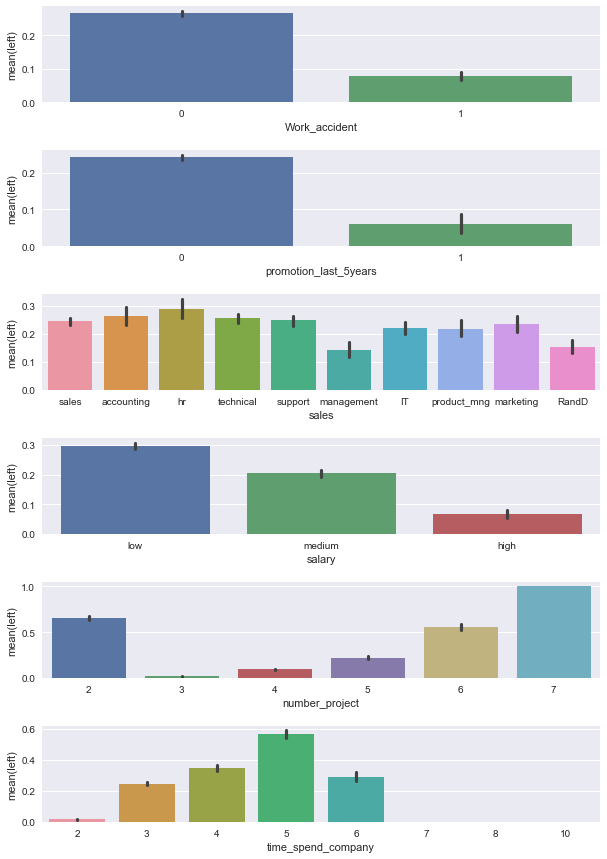

In [205]:
fig, ax = plt.subplots(len(categorical_columns),1,figsize=(10,15))
for i, col in enumerate(categorical_columns):
    sns.barplot(x=col, y="left", data=data, ax = ax[i])
    plt.subplots_adjust(hspace=0.5)

In [206]:
features_to_use = ['satisfaction_level','last_evaluation','average_montly_hours',
                   'Work_accident','promotion_last_5years','sales','salary',
                   'number_project','time_spend_company']

In [207]:
len(features_to_use)

9

In [208]:
data_dummies = pd.get_dummies(data[features_to_use])
data_dummies.head()

,satisfaction_level,last_evaluation,average_montly_hours,Work_accident,promotion_last_5years,number_project,time_spend_company,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,157,0,0,2,3,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,262,0,0,5,6,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,272,0,0,7,4,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,223,0,0,5,5,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,159,0,0,2,3,0,0,0,0,0,0,0,1,0,0,0,1,0


In [209]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 15, test_size=0.2, random_state=23)
sss.get_n_splits(data['left'])

for train_index, test_index in sss.split(data_dummies, data['left']):
    X_train, X_test = data_dummies.iloc[train_index], data_dummies.iloc[test_index]
    y_train, y_test = data['left'][train_index], data['left'][test_index]

y_test.value_counts()

0    2286
1     714
Name: left, dtype: int64

In [210]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print (lr.score(X_train, y_train))
print (lr.score(X_test, y_test)) 

0.790315859655
0.788333333333


#### Hypothesis 1
If a person has spent more than a certain number of years in the company then they are likely to stay in the company and also when a certain has just joined the company then they are not likely to leave

In [211]:
print (pd.crosstab(data['time_spend_company'], data['left']))
print (pd.crosstab(data['time_spend_company'], data['left']).apply(lambda r: r/r.sum(), axis=1))

left                   0     1
time_spend_company            
2                   3191    53
3                   4857  1586
4                   1667   890
5                    640   833
6                    509   209
7                    188     0
8                    162     0
10                   214     0
left                       0         1
time_spend_company                    
2                   0.983662  0.016338
3                   0.753841  0.246159
4                   0.651936  0.348064
5                   0.434487  0.565513
6                   0.708914  0.291086
7                   1.000000  0.000000
8                   1.000000  0.000000
10                  1.000000  0.000000


In [212]:
# lets create a new feature which try to put the time_spend_company based on the percenatge of people who left
data['time_spend_company_bucket'] = 'CatA'
data['time_spend_company_bucket'].loc[(data['time_spend_company']==2)|
                                      (data['time_spend_company']==7)|
                                      (data['time_spend_company']==8)|
                                      (data['time_spend_company']==10)] = 'CatB'
data['time_spend_company_bucket'].loc[(data['time_spend_company']==3)|
                                      (data['time_spend_company']==4)|
                                      (data['time_spend_company']==6)] = 'CatC'

In [213]:
features_to_use.append("time_spend_company_bucket")

#### Hyppothesis 2
If time per project is very high then that person is likely to leave because of lack of new challenges

In [214]:
# lets create a new feature time_per_project
data['time_per_project'] = data['time_spend_company']/data['number_project']
data['time_per_project'].head()

0    1.500000
1    1.200000
2    0.571429
3    1.000000
4    1.500000
Name: time_per_project, dtype: float64

In [215]:
print (round(data['time_per_project'].max()))
print (round(data['time_per_project'].min()))

5.0
0.0


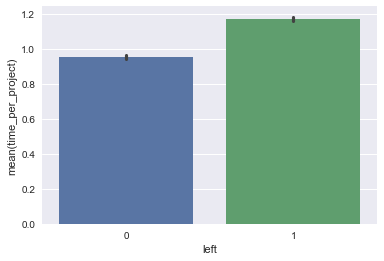

In [216]:
sns.barplot(x = "left", y = "time_per_project", data = data)

In [217]:
# We will segregate the time per project variable into several buckets
data['time_per_project_category'] = "A"
data['time_per_project_category'].loc[data['time_per_project']<=1] = "B"
data['time_per_project_category'].loc[(data['time_per_project']>1)&
                                      (data['time_per_project']>1)] = "C"

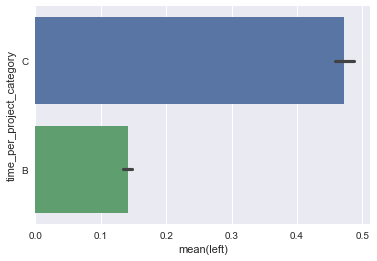

In [218]:
sns.barplot(x = "left", y = "time_per_project_category", data = data)

In [219]:
features_to_use.append("time_per_project_category")

In [220]:
# Lets look at the relation of salary with employees leaving
print (pd.crosstab(data['salary'], data['left']))
print (pd.crosstab(data['salary'], data['left']).apply(lambda r: r/r.sum(), axis=1))

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317
left           0         1
salary                    
high    0.933711  0.066289
low     0.703116  0.296884
medium  0.795687  0.204313


#### Salary is quite a distinguishing factor in determining the target variable

Is there any relation between salary and time_spend_company and employees leaving

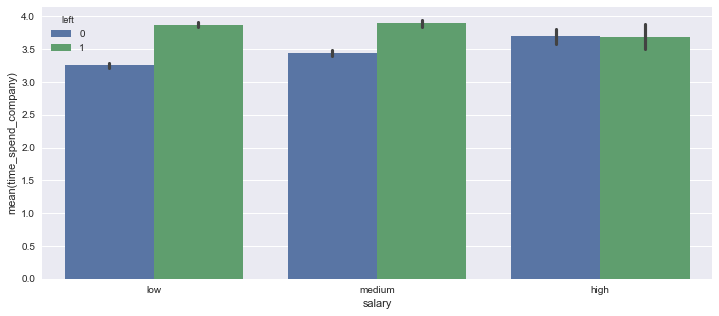

In [221]:
plt.figure(figsize=(12,5))
sns.barplot(x = "salary", y = "time_spend_company", hue = 'left', data = data)

#### Hypothesis 3
If the salary is less and the number of projects is high then people will leave

In [222]:
data['salary_number_project'] = "A"
data['salary_number_project'].loc[(data['salary']=='low')&(data['number_project']>=6)] = "B"

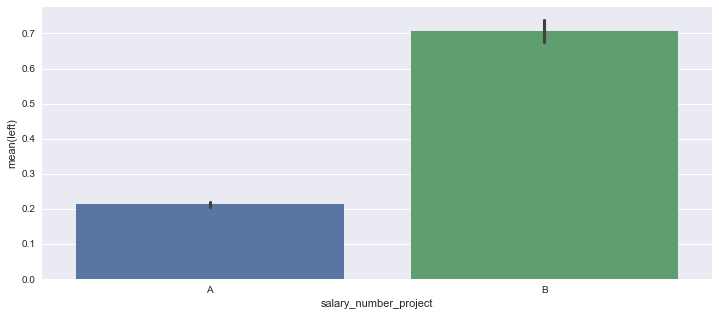

In [223]:
plt.figure(figsize=(12,5))
sns.barplot(x = "salary_number_project", y = "left", data = data)

#### We have hit a goldmine here
salary_number_project is a very useful variable

In [224]:
features_to_use.append("salary_number_project")

In [225]:
# Lets look at the relationship between sales variable and left variable
print (pd.crosstab(data['sales'], data['left']))
print (pd.crosstab(data['sales'], data['left']).apply(lambda r: r/r.sum(), axis=1))

left            0     1
sales                  
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697
left                0         1
sales                          
IT           0.777506  0.222494
RandD        0.846252  0.153748
accounting   0.734029  0.265971
hr           0.709066  0.290934
management   0.855556  0.144444
marketing    0.763403  0.236597
product_mng  0.780488  0.219512
sales        0.755072  0.244928
support      0.751009  0.248991
technical    0.743750  0.256250


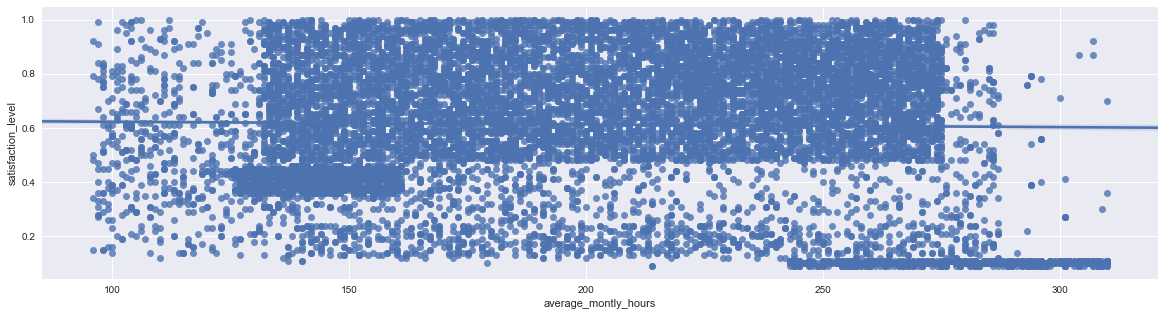

In [226]:
# Lets look at the relationship between satisfaction level and average monthly hours
plt.figure(figsize=(20,5))
sns.regplot(data.average_montly_hours, data.satisfaction_level)

Nothing much useful could be gathered from the above plot

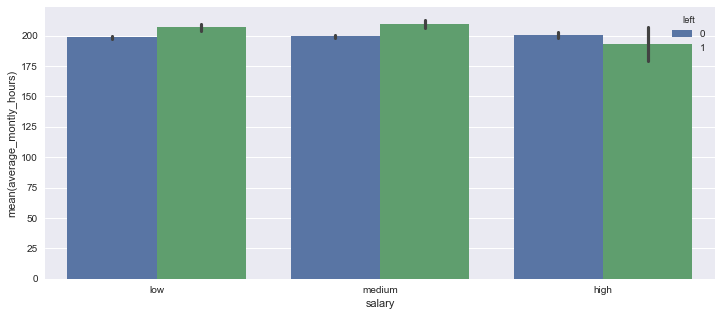

In [227]:
plt.figure(figsize=(12,5))
sns.barplot(x = "salary", y = "average_montly_hours", hue = 'left', data = data)

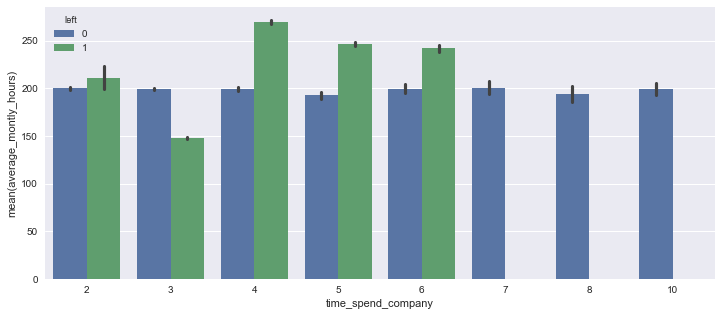

In [228]:
plt.figure(figsize=(12,5))
sns.barplot(x = "time_spend_company", y = "average_montly_hours", hue = 'left', data = data)

#### Hypothesis 4
If the time spent in company is more like 4, 5 and 6 and the average monthly hours is more than 225 then people are likely to leave

In [229]:
data['time_spend_avg_monthly_hours'] = "A"
data['time_spend_avg_monthly_hours'].loc[(data['time_spend_company']>=4)&
                                         (data['time_spend_company']<=6)&
                                         (data['average_montly_hours']>=225)] = "B"

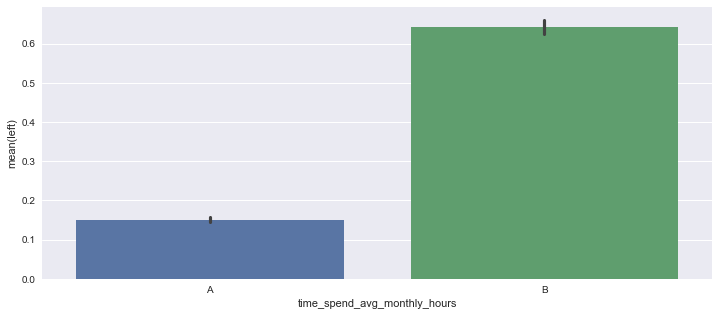

In [230]:
plt.figure(figsize=(12,5))
sns.barplot(x = "time_spend_avg_monthly_hours", y = "left", data = data)

In [231]:
features_to_use.append("time_spend_avg_monthly_hours")

#### Hypothesis 5
If an employee has not received promotion and his avg monthly hours is high the also he is likely to leave

In [232]:
data['promotion_avg_monthly_hours'] = "A"
data['promotion_avg_monthly_hours'].loc[(data['average_montly_hours']>=225)&
                                        (data['promotion_last_5years']==0)] = "B"

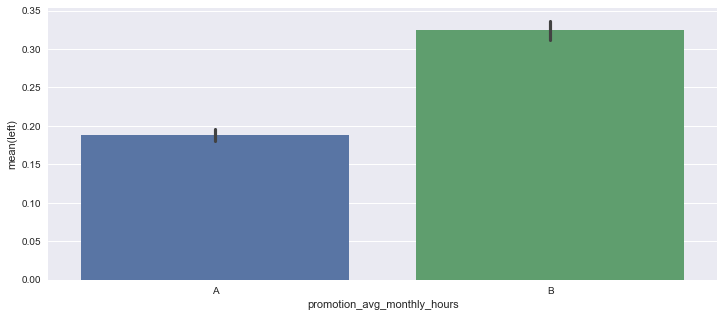

In [233]:
plt.figure(figsize=(12,5))
sns.barplot(x = "promotion_avg_monthly_hours", y = "left", data = data)

In [234]:
# The feature created is not so significant but we will include it for now
features_to_use.append("promotion_avg_monthly_hours")

#### Hypothesis 6
If the salary is low and the average monthly hours is more then he is likely to leave

In [235]:
data['salary_avg_monthly_hours'] = "A"
data['salary_avg_monthly_hours'].loc[(data['average_montly_hours']>=250)&
                                     (data['salary']=="low")] = "B"

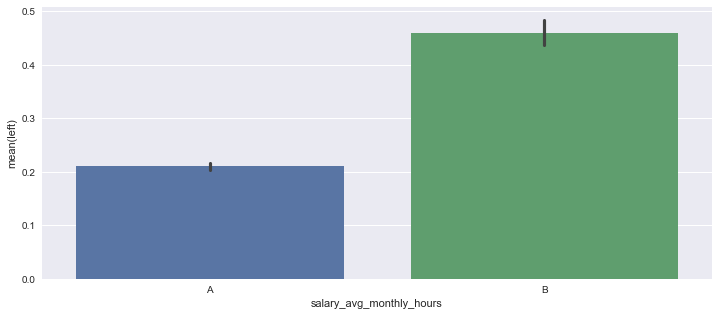

In [236]:
plt.figure(figsize=(12,5))
sns.barplot(x = "salary_avg_monthly_hours", y = "left", data = data)

In [237]:
features_to_use.append("salary_avg_monthly_hours")

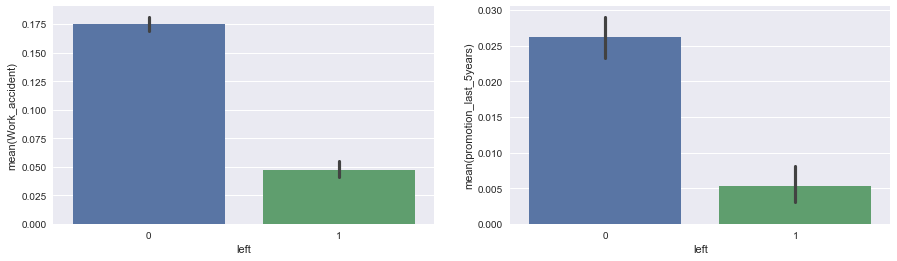

In [238]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
sns.barplot(x="left", y="Work_accident", data=data, ax = ax[0])
sns.barplot(x="left", y="promotion_last_5years", data=data, ax = ax[1])

#### Hypothesis 7
The employess who have suffered from work accident and had a promotion would display a certain kind of behavior

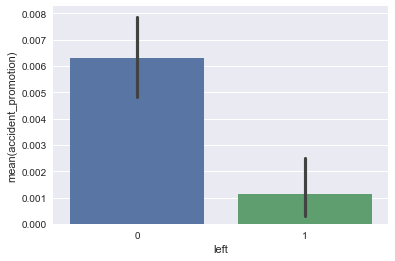

In [239]:
data['accident_promotion'] = data.Work_accident * data.promotion_last_5years
sns.barplot(x="left", y="accident_promotion", data=data)

If a person has suffered from an accident and had a promotion then he is likely to leave

In [240]:
features_to_use.append("accident_promotion")

In [241]:
cont = []
for col in data[features_to_use].columns.values:
    if data[col].dtype != 'object':
        cont.append(col)

In [242]:
len(features_to_use)

16

In [243]:
data_dummies = pd.get_dummies(data[features_to_use])
data_dummies.shape

(14999, 34)

In [244]:
for train_index, test_index in sss.split(data_dummies, data['left']):
    X_train, X_test = data_dummies.iloc[train_index], data_dummies.iloc[test_index]
    y_train, y_test = data['left'][train_index], data['left'][test_index]

lr.fit(X_train, y_train)
print (lr.score(X_train, y_train))
print (lr.score(X_test, y_test))

0.890324193683
0.895666666667


In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
X_train_cont = X_train[cont]
X_train_cat = X_train.drop(cont, axis=1)

X_test_cont = X_test[cont]
X_test_cat = X_test.drop(cont, axis=1)

X_train_cont_scaler = X_train_cont
X_test_cont_scaler = X_test_cont

for col in X_train_cont_scaler.columns.values:
    scaler = StandardScaler().fit(X_train_cont_scaler[col])
    X_train_cont_scaler[col] = scaler.transform(X_train_cont_scaler[col].reshape(1,-1))[0]
    X_test_cont_scaler[col] = scaler.transform(X_test_cont_scaler[col].reshape(1,-1))[0]
    
X_train_scaler = X_train_cont_scaler.join(X_train_cat)
X_test_scaler = X_test_cont_scaler.join(X_test_cat)

In [247]:
lr.fit(X_train_scaler, y_train)
print (lr.score(X_train_scaler, y_train))
print (lr.score(X_test_scaler, y_test)) 

0.889990832569
0.895333333333
